Code berikut merupakan implementasi untuk melakukan transfer learning pada sebuah model jaringan saraf tiruan (neural network) menggunakan TensorFlow dan Keras.

`os`: Library untuk berinteraksi dengan sistem operasi.

`shutil`: Library untuk melakukan operasi manipulasi file dan direktori.

`random`: Library untuk menghasilkan angka acak.

`tensorflow`: Library utama untuk pembuatan dan pelatihan model jaringan saraf tiruan.

`train_test_split`: Dari scikit-learn, digunakan untuk membagi dataset menjadi data pelatihan dan data pengujian.

`ImageDataGenerator`: Digunakan untuk augmentasi gambar, yaitu menghasilkan variasi dari gambar-gambar pelatihan yang ada.

`MobileNetV2` dan `ResNet50`: Model arsitektur yang telah dilatih sebelumnya dan dapat digunakan untuk transfer learning. Keduanya tersedia dalam TensorFlow.

`Adam`: Optimizer yang umum digunakan untuk melatih model.

`Dense`, `GlobalAveragePooling2D`, `Conv2D`, `MaxPooling2D`, `Flatten`: Lapisan-lapisan yang akan digunakan untuk membangun arsitektur model jaringan saraf.

In [1]:
import os
import shutil
import random
import tensorflow as tf

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import ResNet50

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten

Code berikut merupakan code yang digunakan untuk membuat struktur direktori baru dan mengorganisir data dari dua direktori awal (`fresh_fruit_dir` dan `stale_fruit_dir`) ke dalam empat direktori baru (`train_fresh_dir`, `test_fresh_dir`, `train_stale_dir`, dan `test_stale_dir`).

*Specify the directory paths*: Menentukan path dari dua direktori awal yang berisi data gambar buah segar (`fresh_fruit_dir`) dan buah basi (`stale_fruit_dir`).

*Specify the new directory paths for training and testing sets*: Menentukan path untuk empat direktori baru yang akan dibuat. Ada dua direktori untuk setiap kategori buah (segar dan basi), satu untuk data pelatihan (train) dan satu lagi untuk data pengujian (test).

*Create the new directories*: Membuat direktori baru menggunakan fungsi `os.makedirs`.
Parameter `exist_ok=True` digunakan agar tidak ada error jika direktori sudah ada sebelumnya.
Fungsi ini akan membuat seluruh path direktori yang diberikan, termasuk direktori induknya jika belum ada.

In [2]:
# Specify the directory paths
fresh_apple_dir = 'dataset/fresh_apple'
stale_apple_dir = 'dataset/stale_apple'

# Specify the new directory paths for training and testing sets
train_fresh_dir = 'dataset_apple/train/fresh_apple'
test_fresh_dir = 'dataset_apple/test/fresh_apple'
train_stale_dir = 'dataset_apple/train/stale_apple'
test_stale_dir = 'dataset_apple/test/stale_apple'

# Create the new directories
os.makedirs(train_fresh_dir, exist_ok=True)
os.makedirs(test_fresh_dir, exist_ok=True)
os.makedirs(train_stale_dir, exist_ok=True)
os.makedirs(test_stale_dir, exist_ok=True)


Code berikut untuk mendefinisikan sebuah fungsi bernama `split_and_move` yang digunakan untuk membagi data menjadi set pelatihan dan pengujian, serta memindahkan file-file tersebut ke direktori yang sesuai. 

Fungsi ini menerima beberapa parameter: 
`original_dir`: Direktori awal yang berisi file-file yang akan dibagi.
`train_dir`: Direktori tujuan untuk file-file set pelatihan.
`test_dir`: Direktori tujuan untuk file-file set pengujian.
`category`: Nama kategori atau label untuk file-file yang akan dipindahkan.
`test_ratio`: Rasio data pengujian terhadap total data (default: 0.2 atau 20%).

Menggunakan `os.listdir` untuk mendapatkan daftar semua file dalam direktori awal.

Menggunakan `train_test_split` dari `scikit-learn` untuk membagi daftar file menjadi file-file pelatihan dan pengujian.

Menggunakan `shutil.move` untuk memindahkan file-file pelatihan dari direktori awal ke direktori pelatihan dan pengujian.

Dengan menjalankan fungsi ini, Kita dapat membagi data dalam `original_dir` ke dalam set pelatihan dan pengujian, dan memindahkan file-file tersebut ke direktori yang sesuai (`train_dir` dan `test_dir`).

In [3]:
# Function to split and move files to training and testing sets
def split_and_move(original_dir, train_dir, test_dir, category, test_ratio=0.2):
    # List all files in the original directory
    files = os.listdir(original_dir)
    
    # Split files into training and testing sets
    train_files, test_files = train_test_split(files, test_size=test_ratio, random_state=42)
    
    # Move training files to the training directory
    for file in train_files:
        source_path = os.path.join(original_dir, file)
        destination_path = os.path.join(train_dir, file)
        shutil.move(source_path, destination_path)

    # Move testing files to the testing directory
    for file in test_files:
        source_path = os.path.join(original_dir, file)
        destination_path = os.path.join(test_dir, file)
        shutil.move(source_path, destination_path)

Code berikut menggunakan fungsi `split_and_move` yang telah didefinisikan sebelumnya untuk membagi dataset buah segar (`fresh_apple_dir`) dan dataset buah basi (`stale_apple_dir`) menjadi set pelatihan dan pengujian.

Dengan menjalankan code ini, data dari dua jenis buah apel (segar dan basi) telah dibagi menjadi set pelatihan dan pengujian, dan file-file tersebut telah dipindahkan ke direktori yang sesuai. Struktur direktori yang baru dapat digunakan untuk melatih dan menguji model klasifikasi, terutama dalam konteks transfer learning menggunakan TensorFlow dan Keras.

Code berikut untuk mendefinisikan sebuah fungsi bernama `balance_data` yang digunakan untuk membuat set data yang seimbang dengan mengambil sejumlah sampel acak dari suatu direktori sumber dan menyalinnya ke direktori target. 

Fungsi ini menerima beberapa parameter:
`source_dir`: Direktori sumber yang berisi file-file yang akan diambil sampelnya.
`target_dir`: Direktori tujuan untuk menyimpan file-file sampel yang seimbang.
`target_class`: Nama kategori atau label untuk data yang akan disalin.
`desired_count`: Jumlah sampel yang diinginkan untuk setiap kategori.

*List all files in the source directory*: Menggunakan `os.listdir` untuk mendapatkan daftar semua file dalam direktori sumber.

*Shuffle the files to randomly select samples*: Menggunakan `random.shuffle` untuk mengacak urutan file-file sehingga sampel yang diambil nantinya akan bersifat acak.

*Create the target directory if it doesn't exist*: Membuat direktori tujuan jika belum ada. `exist_ok=True` digunakan agar tidak ada error jika direktori sudah ada sebelumnya.

*Copy a subset of files to the target directory*: Menggunakan `shutil.copy` untuk menyalin sejumlah sampel yang diinginkan dari direktori sumber ke direktori tujuan.

*Print information about the balanced data*: Mencetak informasi tentang sejauh mana data telah diseimbangkan, termasuk kategori, jumlah sampel yang diinginkan, dan direktori tujuan.

Fungsi ini dapat digunakan untuk menciptakan set data yang seimbang, yang seringkali diperlukan dalam konteks pembelajaran mesin agar model dapat belajar dengan baik dari setiap kategori.

In [4]:
def balance_data(source_dir, target_dir, target_class, desired_count):
    # List all files in the source directory
    source_files = os.listdir(source_dir)
    
    # Shuffle the files to randomly select samples
    random.shuffle(source_files)
    
    # Create the target directory if it doesn't exist
    os.makedirs(target_dir, exist_ok=True)
    
    # Copy a subset of files to the target directory
    for file_name in source_files[:desired_count]:
        source_path = os.path.join(source_dir, file_name)
        target_path = os.path.join(target_dir, file_name)
        shutil.copy(source_path, target_path)
    #Print information about the balanced data
    print(f"Balanced {target_class} data: {desired_count} samples copied to {target_dir}")

In [5]:
def balance_dataset(train_fresh_dir, test_fresh_dir, train_stale_dir, test_stale_dir):
    # Set the desired number of samples for each class
    desired_count = min(len(os.listdir(train_fresh_dir)), len(os.listdir(train_stale_dir)))
    
    # Balance the training data
    balance_data(train_fresh_dir, 'balanced_dataset/train/fresh_fruit', 'fresh_fruit', desired_count)
    balance_data(train_stale_dir, 'balanced_dataset/train/stale_fruit', 'stale_fruit', desired_count)
    
    # Balance the testing data
    balance_data(test_fresh_dir, 'balanced_dataset/test/fresh_fruit', 'fresh_fruit', desired_count)
    balance_data(test_stale_dir, 'balanced_dataset/test/stale_fruit', 'stale_fruit', desired_count)



In [6]:
# Call the function to balance the dataset
balance_dataset(train_fresh_dir, test_fresh_dir, train_stale_dir, test_stale_dir)

Balanced fresh_fruit data: 442 samples copied to balanced_dataset/train/fresh_fruit
Balanced stale_fruit data: 442 samples copied to balanced_dataset/train/stale_fruit
Balanced fresh_fruit data: 442 samples copied to balanced_dataset/test/fresh_fruit
Balanced stale_fruit data: 442 samples copied to balanced_dataset/test/stale_fruit


# CNN

In [13]:
TRAINING_DIR = 'balanced_dataset/train'
train_datagen = ImageDataGenerator(rescale=1/255, brightness_range=[0, 1])

train_generator = train_datagen.flow_from_directory(
    directory=TRAINING_DIR,
    target_size=(254, 254),
    batch_size=64,
    class_mode='binary'
)

VALIDATION_DIR = 'balanced_dataset/test'
valid_datagen = ImageDataGenerator(rescale=1/255)

valid_generator = valid_datagen.flow_from_directory(
    directory=VALIDATION_DIR,
    target_size=(254, 254),
    batch_size=1,
    class_mode='binary'
)

model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(254, 254, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, validation_data=valid_generator, epochs=8, verbose=1)


Found 885 images belonging to 2 classes.


Found 222 images belonging to 2 classes.
Epoch 1/8
14/14 [==============================] - 13s 875ms/step - loss: 4.1736 - accuracy: 0.5141 - val_loss: 4.2774 - val_accuracy: 0.5000
Epoch 2/8
14/14 [==============================] - 11s 807ms/step - loss: 1.0772 - accuracy: 0.6011 - val_loss: 0.7210 - val_accuracy: 0.5811
Epoch 3/8
14/14 [==============================] - 12s 817ms/step - loss: 0.5241 - accuracy: 0.7333 - val_loss: 0.3365 - val_accuracy: 0.8784
Epoch 4/8
14/14 [==============================] - 11s 814ms/step - loss: 0.4471 - accuracy: 0.8407 - val_loss: 0.2753 - val_accuracy: 0.8964
Epoch 5/8
14/14 [==============================] - 12s 816ms/step - loss: 0.3534 - accuracy: 0.8599 - val_loss: 0.2404 - val_accuracy: 0.9054
Epoch 6/8
14/14 [==============================] - 11s 812ms/step - loss: 0.3396 - accuracy: 0.8757 - val_loss: 0.2106 - val_accuracy: 0.9009
Epoch 7/8
14/14 [==============================] - 11s 815ms/step - loss: 0.3141 - accuracy: 0.8814 - val_l

In [14]:
import matplotlib.pyplot as plt

def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

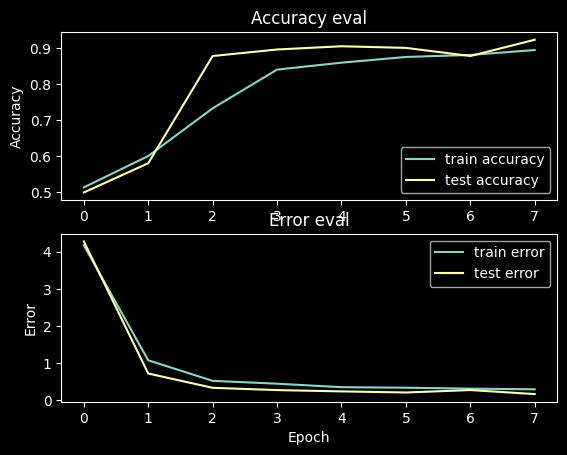

In [15]:
plot_history(history)